In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

> First, I made a mistake naming the data set! **It's 2015 data, not 2014 data.** But yes, still use `311-2014.csv`. You can rename it.

# Importing and preparing your data

Import your data, but **only the first 200,000 rows**. You'll also want to change the index to be a datetime based on the **Created Date** column - you'll want to check if it's already a datetime, and parse it if not.

In [2]:
df = pd.read_csv("311-2014.csv", nrows=200000, low_memory = False)

In [3]:
df.head(3)
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [4]:
type(df['Created Date'][0])
print(df['Created Date'][0])
dateutil.parser.parse(df['Created Date'][0])

07/06/2015 10:58:27 AM


datetime.datetime(2015, 7, 6, 10, 58, 27)

In [5]:
def str_to_time(str_date):
    datetype_date = dateutil.parser.parse(str_date)
    return datetype_date

In [6]:
df['created_date'] = df['Created Date'].apply(str_to_time)

In [7]:
df.index=df['created_date']
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_date
created_date,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)",2015-07-06 10:58:27
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)",2015-07-03 13:26:29
2015-11-09 03:55:09,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)",2015-11-09 03:55:09


What was the **most popular type of complaint**, and how many times was it filed?

In [8]:
df.groupby("Complaint Type").count()['Unique Key'].sort_values(ascending=False)

Complaint Type
Blocked Driveway                       21779
Illegal Parking                        19837
HEAT/HOT WATER                         12408
Noise - Street/Sidewalk                11949
Noise - Commercial                      9603
Street Condition                        9008
Graffiti                                5993
Benefit Card Replacement                5859
Broken Muni Meter                       5659
UNSANITARY CONDITION                    4774
Derelict Vehicle                        4704
Noise - Vehicle                         4495
DOF Literature Request                  4382
PAINT/PLASTER                           4306
Consumer Complaint                      4030
Damaged Tree                            3558
Taxi Complaint                          3543
PLUMBING                                3388
HPD Literature Request                  3305
Overgrown Tree/Branches                 2949
Maintenance or Facility                 2517
DOOR/WINDOW                             

Make a horizontal bar graph of the **top 5 most frequent complaint types**.

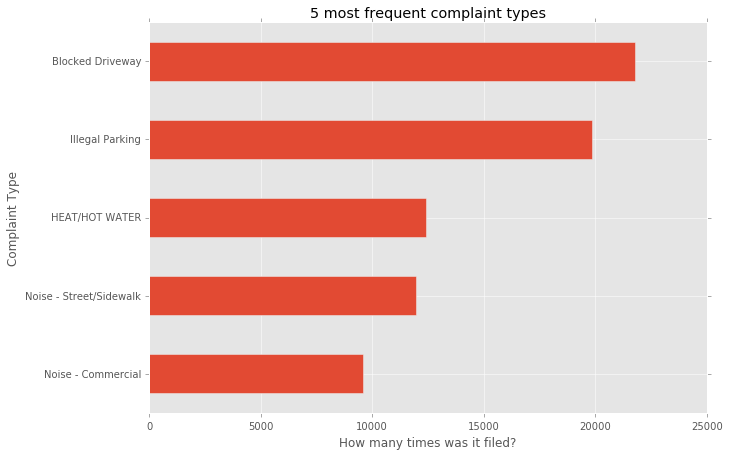

In [9]:
plt.style.use('ggplot')
ax = df.groupby("Complaint Type").count()['Unique Key'].sort_values(ascending=True).tail(5).plot(kind='barh', figsize=(10,7))
ax.set_title("5 most frequent complaint types")
ax.set_xlabel("How many times was it filed?")

Which borough has the **most complaints per capita?** Since it's only 5 boroughs, you can do the math manually.

In [10]:
df.groupby('Borough').count()['Unique Key'].sort_values(ascending=False)

Borough
BROOKLYN         57129
QUEENS           46824
MANHATTAN        42050
BRONX            29610
Unspecified      17000
STATEN ISLAND     7387
Name: Unique Key, dtype: int64

In [11]:
#https://en.wikipedia.org/wiki/Brooklyn
inhabitants=[{'state': "BROOKLYN", 'inhabitants':2621793},
            {'state': "QUEENS", 'inhabitants': 2321580},
            {'state': "MANHATTAN", 'inhabitants': 1636268},
            {'state': "BRONX", 'inhabitants': 1438159},
            {'state': "STATEN ISLAND", 'inhabitants': 473279},]
inhabitantsdf=pd.DataFrame(inhabitants)
inhabitantsdf

,inhabitants,state
0,2621793,BROOKLYN
1,2321580,QUEENS
2,1636268,MANHATTAN
3,1438159,BRONX
4,473279,STATEN ISLAND


In [12]:
print("Complaints per capita: Brooklyn", 57129/2621793)
print("Complaints per capita: Queens", 46824/2321580)
print("Complaints per capita: Manhattan", 42050/1636268)
print("Complaints per capita: Bronx", 29610/1438159)
print("Complaints per capita: Staten Island", 7387/473279)

Complaints per capita: Brooklyn 0.02179004978653921
Complaints per capita: Queens 0.020169022820665235
Complaints per capita: Manhattan 0.025698724169879263
Complaints per capita: Bronx 0.020588822237318682
Complaints per capita: Staten Island 0.015608129665588374


Manhattan has the most complaints per capita.

According to your selection of data, **how many cases were filed in March?** How about May?

In [13]:
march_cases = df["2015-03"]['Unique Key'].count()
may_cases = df["2015-05"]['Unique Key'].count()
print("Cases filed in March:", march_cases)
print("Cases filed in May:", may_cases)

Cases filed in March: 15025
Cases filed in May: 49715


I'd like to see all of the 311 complaints **called in on April 1st.**

> **Surprise!** We couldn't do this in class, but it was just a limitation of our data set

In [14]:
df["2015-04-01"]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,created_date
created_date,,,,,,,,,,,,,,,,,,,,,
2015-04-01 21:37:42,30311691,04/01/2015 09:37:42 PM,04/01/2015 10:49:33 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.609810,-73.922498,"(40.60980966645303, -73.92249759633725)",2015-04-01 21:37:42
2015-04-01 23:12:04,30307701,04/01/2015 11:12:04 PM,04/01/2015 11:32:40 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11205,700 MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694644,-73.955504,"(40.694643700748486, -73.95550356170298)",2015-04-01 23:12:04
2015-04-01 13:10:35,30313389,04/01/2015 01:10:35 PM,04/07/2015 04:01:08 PM,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11422,245-16 149 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.653016,-73.738626,"(40.653016256598534, -73.73862588133056)",2015-04-01 13:10:35
2015-04-01 17:37:38,30314393,04/01/2015 05:37:38 PM,04/03/2015 11:40:54 AM,DPR,Department of Parks and Recreation,Maintenance or Facility,Hours of Operation,Park,11211,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 17:37:38
2015-04-01 12:32:40,30309207,04/01/2015 12:32:40 PM,04/17/2015 01:06:49 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Installation/Work Quality,NaN,11423,90-71 198 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.714299,-73.761158,"(40.71429859671565, -73.76115807774032)",2015-04-01 12:32:40
2015-04-01 18:44:50,30311759,04/01/2015 06:44:50 PM,06/24/2015 11:27:00 AM,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,10467,862 EAST 213 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.878028,-73.860237,"(40.87802828144708, -73.86023734606933)",2015-04-01 18:44:50
2015-04-01 16:30:15,30309690,04/01/2015 04:30:15 PM,04/01/2015 11:27:22 PM,NYPD,New York City Police Department,Animal Abuse,Neglected,Residential Building/House,11368,107-15 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.757811,-73.861677,"(40.757811195752154, -73.86167714731972)",2015-04-01 16:30:15
2015-04-01 09:04:07,30307990,04/01/2015 09:04:07 AM,04/06/2015 09:17:10 AM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,Miscellaneous,Senior Address,10027,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 09:04:07
2015-04-01 07:46:58,30308253,04/01/2015 07:46:58 AM,04/01/2015 09:32:31 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11370,32-51 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.756412,-73.887405,"(40.75641194675221, -73.88740503059863)",2015-04-01 07:46:58


What was the most popular type of complaint on April 1st?

In [15]:
df["2015-04-01"].groupby('Complaint Type').count()["Unique Key"].sort_values(ascending=False).head(1)

Complaint Type
Illegal Parking    67
Name: Unique Key, dtype: int64

What were the **most popular three types of complaint** on April 1st

In [16]:
df["2015-04-01"].groupby('Complaint Type').count()["Unique Key"].sort_values(ascending=False).head(3)

Complaint Type
Illegal Parking     67
Street Condition    64
Blocked Driveway    58
Name: Unique Key, dtype: int64

**What month has the most reports filed?** How many? Graph it.

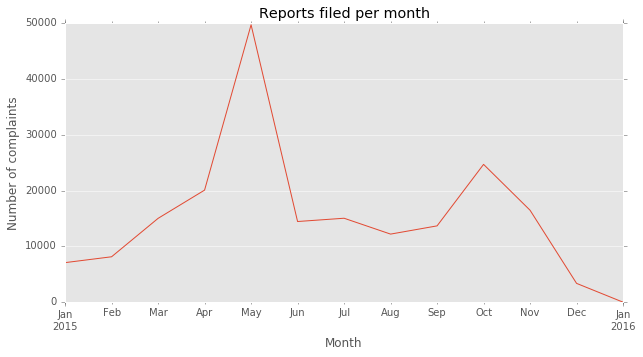

In [17]:
ax = df.resample('m')['Unique Key'].count().plot(figsize=(10,5))
ax.set_title("Reports filed per month")
ax.set_ylabel("Number of complaints")
ax.set_xlabel("Month")

In [18]:
df.resample('m')['Unique Key'].count().max()
print("The month with most cases is May with",df.resample('m')['Unique Key'].count().max(), "cases.")

The month with most cases is May with 49715 cases.


**What week of the year has the most reports filed?** How many? Graph the weekly complaints.

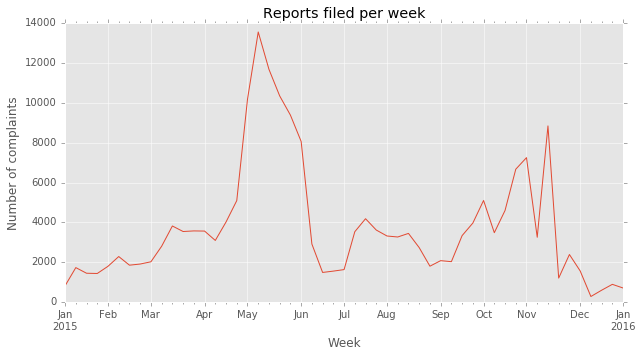

In [19]:
ax = df.resample('W')['Unique Key'].count().plot(figsize=(10,5))
ax.set_title("Reports filed per week")
ax.set_ylabel("Number of complaints")
ax.set_xlabel("Week")

# weeknumbers= list(range(1,52))
# ax.set_xticks(weeknumbers)

In [20]:
print("The week with most cases is the second in May with",df.resample('W')['Unique Key'].count().max(), "cases.")

The week with most cases is the second in May with 13559 cases.


Noise complaints are a big deal. Use `.str.contains` to select noise complaints, and make an chart of when they show up annually. **Then** make a chart about when they show up every day (cyclic).

In [21]:
noise_df = df[df["Complaint Type"].str.contains("Noise ")]

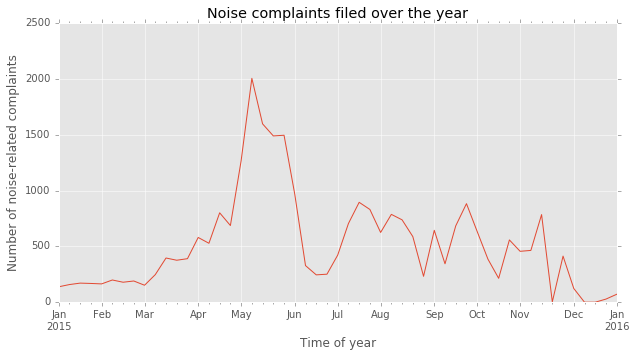

In [22]:
noiseax = noise_df.resample('W')['Unique Key'].count().plot(figsize=(10,5))
noiseax.set_title("Noise complaints filed over the year")
noiseax.set_ylabel("Number of noise-related complaints")
noiseax.set_xlabel("Time of year")

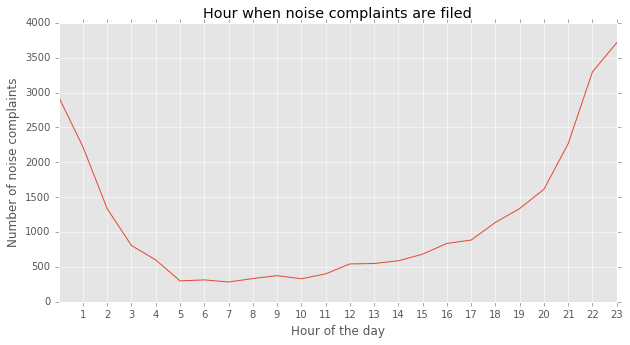

In [23]:
noisedayax = noise_df.groupby(by=noise_df.index.hour)['Unique Key'].count().plot(figsize=(10,5))
noisedayax.set_title("Hour when noise complaints are filed")
noisedayax.set_ylabel("Number of noise complaints")
noisedayax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
noisedayax.set_xlabel("Hour of the day")

**Which were the top five days of the year for filing complaints?** How many on each of those days? Graph it.

In [24]:
df.resample('D')['Unique Key'].count().sort_values(ascending=False).head(5)

created_date
2015-10-28    2697
2015-11-09    2529
2015-05-04    2465
2015-05-11    2293
2015-10-29    2258
Name: Unique Key, dtype: int64

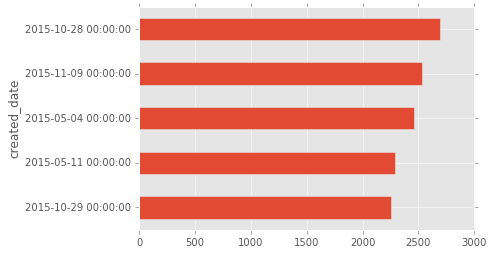

In [25]:
df.resample('D')['Unique Key'].count().sort_values().tail(5).plot(kind='barh')

**What hour of the day are the most complaints?** Graph a day of complaints.

In [26]:
df.groupby(by=df.index.hour)['Unique Key'].count()

0     22427
1      3927
2      2400
3      1644
4      1460
5      1528
6      2687
7      4992
8      8157
9     11490
10    12343
11    12729
12    12469
13    11745
14    11205
15    11454
16    10966
17     9291
18     8965
19     7636
20     7322
21     7658
22     8085
23     7420
Name: Unique Key, dtype: int64

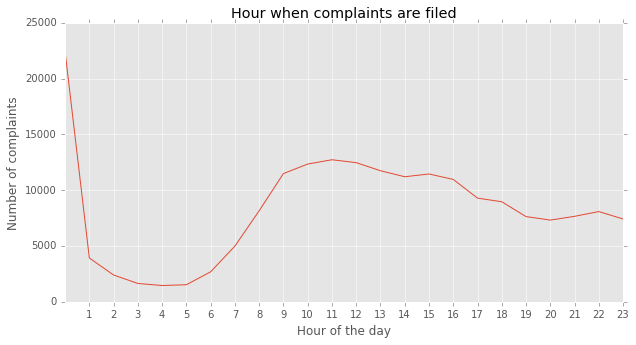

In [27]:
ax = df.groupby(by=df.index.hour)['Unique Key'].count().plot(figsize=(10,5))
ax.set_title("Hour when complaints are filed")
ax.set_ylabel("Number of complaints")
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
ax.set_xlabel("Hour of the day")

One of the hours has an odd number of complaints. What are the most common complaints at that hour, and what are the most common complaints the hour before and after?

In [31]:
# Midnight is is an outlier, complaint-number-wise
hourly_df = pd.DataFrame(df.groupby(df.index.hour)['Complaint Type'].value_counts())
hourly_df

Complaint Type
   Complaint Type                                         
0  HEAT/HOT WATER                                     4534
   Rodent                                             2112
   PAINT/PLASTER                                      1946
   UNSANITARY CONDITION                               1820
   PLUMBING                                           1502
   Noise - Commercial                                 1338
   Noise - Street/Sidewalk                            1188
   DOOR/WINDOW                                        1015
   GENERAL                                             894
   WATER LEAK                                          875
   ELECTRIC                                            852
   Blocked Driveway                                    701
   FLOORING/STAIRS                                     683
   Illegal Parking                                     588
   Noise - Vehicle                                     336
   SAFETY                                              296
   APPLIANCE                                           258
   Standing Water                                      213
   Taxi Complaint                                      130
   Unsanitary Animal Pvt Property                      119
   Graffiti                                             92
   Benefit Card Replacement                             83
   Street Condition                                     74
   OUTSIDE BUILDING                                     51
   Noise - Park                                         50
   Derelict Vehicle                                     49
   Food Poisoning                                       41
   ELEVATOR                                             32
   Animal Abuse                                         31
   Food Establishment                                   31
...                                                    ...
23 Noise                                                 3
   Public Payphone Complaint                             3
   SAFETY                                                3
   Asbestos                                              2
   Broken Parking Meter                                  2
   Compliment                                            2
   Ferry Inquiry                                         2
   Illegal Animal Kept as Pet                            2
   Mold                                                  2
   Public Toilet                                         2
   SCRIE                                                 2
   School Maintenance                                    2
   Animal Facility - No Permit                           1
   Bike/Roller/Skate Chronic                             1
   City Vehicle Placard Complaint                        1
   Drinking Water                                        1
   Elevator                                              1
   Highway Sign - Damaged                                1
   Illegal Animal Sold                                   1
   Litter Basket / Request                               1
   Misc. Comments                                        1
   Missed Collection (All Materials)                     1
   Panhandling                                           1
   Recycling Enforcement                                 1
   Request for Information                               1
   Sanitation Condition                                  1
   Senior Center Complaint                               1
   Sewer                                                 1
   Special Projects Inspection Team (SPIT)               1
   Tattooing                                             1

[2741 rows x 1 columns]

In [34]:
#Most common complaint types at midnight
hourly_df['Complaint Type'][0].head(5)

Complaint Type
HEAT/HOT WATER          4534
Rodent                  2112
PAINT/PLASTER           1946
UNSANITARY CONDITION    1820
PLUMBING                1502
Name: Complaint Type, dtype: int64

In [35]:
#Most common complaint types the hour before midnight
hourly_df['Complaint Type'][23].head(5)

Complaint Type
Noise - Street/Sidewalk    1599
Noise - Commercial         1503
Blocked Driveway            973
Illegal Parking             882
Noise - Vehicle             478
Name: Complaint Type, dtype: int64

In [36]:
#Most common complaint types the hour after midnight
hourly_df['Complaint Type'][1].head(5)

Complaint Type
Noise - Commercial         1025
Noise - Street/Sidewalk     897
Blocked Driveway            479
Illegal Parking             400
Noise - Vehicle             249
Name: Complaint Type, dtype: int64

So odd. What's the **per-minute breakdown** of complaints between 12am and 1am? You don't need to include 1am.

Looks like midnight is a little bit of an outlier. Why might that be? Take the 5 most common agencies and graph the times they file reports at (all day, not just midnight).

Graph those same agencies on an annual basis - make it **weekly**. When do people like to complain? When does the NYPD have an odd number of complaints?

Maybe the NYPD deals with different issues at different times? Check the most popular complaints in July and August vs the month of May. Also check the most common complaints for the Housing Preservation Bureau (HPD) in winter vs. summer.